In [10]:
import warnings
import os
import sys
warnings.filterwarnings('ignore')

In [11]:
from qiskit import *

In [4]:
# create 2 qubit quantum register

In [12]:
qr = QuantumRegister(2)

In [7]:
# create 2 classical bits to hold measurement results

In [13]:
cr = ClassicalRegister(2)

In [6]:
# creating a circuit using classical and quantum registers

In [14]:
circuit = QuantumCircuit(qr, cr)

In [10]:
# visualize quantum circuit

In [15]:
%matplotlib inline

In [16]:
circuit.draw()

q1_0: 
      
q1_1: 
      
c1: 2/

In [14]:
# in order to create Entanglement, 1st step is to apply Hadamard gate on one of the qbits

In [17]:
circuit.h(qr[0])

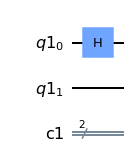

In [18]:
%matplotlib inline
circuit.draw(output='mpl')

In [13]:
## now 2 qubit operation of cx (controlled x gate) 
## it is similar to classical if
## control qubit is the first, and the target of the operation is second qubit

In [19]:
circuit.cx(qr[0], qr[1])

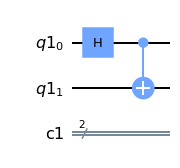

In [20]:
circuit.draw(output='mpl')

In [16]:
 ## with this 2 operation, we aim to generate entanglement between 2 qubits


In [17]:
## now we measure the qbits and store the results in classical bits


In [21]:
circuit.measure(qr,cr)

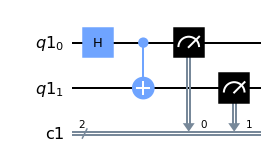

In [22]:
circuit.draw(output='mpl')

In [21]:
## now circuit is ready to run on the classical machine
## to use the quantum simulator on classical machine, we use aer component of qisit
## name of the simulator is qasm_simulator (quantum assembly language )

In [23]:
simulator = Aer.get_backend('qasm_simulator')

In [23]:
## imported the simulator, now we can execute

In [24]:
result = execute(circuit, backend = simulator).result()

In [27]:
## visualise the result using qiskit plot histogram

In [25]:
from qiskit.visualization import plot_histogram

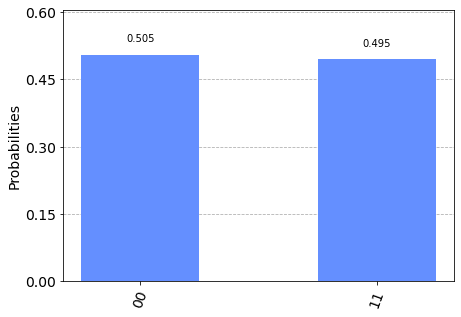

In [26]:
plot_histogram(result.get_counts(circuit))

In [1]:
## Now run on IBM quantum device
## We expect more base states with lower probability amplitudes due to quantum noise

## reading the apikey which is locally stored

In [27]:
root = os.environ['VIRTUAL_ENV']
root = os.path.abspath(os.path.join(root, os.pardir))

env = os.path.join(root,'ibm-apikey.env')

with open(env, 'r') as file:
    data = file.read().replace('\n', '')

In [28]:
from qiskit import IBMQ

In [30]:
IBMQ.save_account(data, overwrite=True)

In [32]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [33]:
## get account provider

In [34]:
provider = IBMQ.get_provider('ibm-q')

In [35]:
## provide device name 

In [36]:
qcomp = provider.get_backend('ibmq_16_melbourne')

In [37]:
## define job which is to run in ibm quantum cloud

In [47]:
job = execute(circuit, backend=qcomp)

In [39]:
## import qiskit job monitor to track the queue of our reques in public quantum device

In [ ]:
from qiskit.tools.monitor import job_monitor

In [ ]:
job_monitor(job)

In [55]:
##job queued for 58 min
## get job result from job id
job = qcomp.retrieve_job('601621eba57ff736d795f008')

In [54]:
result = job.result()

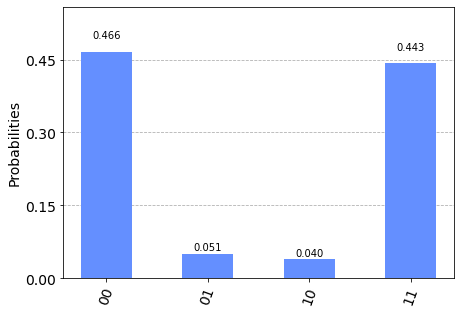

In [56]:
plot_histogram(result.get_counts(circuit))

In [57]:
## real quantum device generates quantum noises thus perturbates the qubit system
## those perturbations yields 2 more base states which has lover probability amplitudes